<a href="https://colab.research.google.com/github/yowlshi/Parkinson-Detection-Machine-Learning/blob/main/Build%20and%20Apply%20Multilayer%20Perceptron%20Parkinson's%20Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **OBJECTIVES**

Build a multilayer perceptron model.

# **THE PROBLEM**



Parkinson's disease is a condition that affects how a person moves. It happens because some cells in the brain stop working properly. This causes problems like shaking when the person is not moving, moving slowly, muscle stiffness, and trouble keeping their balance.

<br>
People with Parkinson's disease can also have other issues like memory problems, feeling sad or worried, and trouble sleeping. The symptoms can be different for each person, and they can get worse over time.<br>


<br>
Parkinson's disease can make daily activities harder, but treatment and support can help manage the symptoms and improve quality of life.

# **THE SOLUTION**

The dataset used has information like age, gender, and medical history, along with test results. The aim is to create a model, using a multilayer perceptron, to decide if someone has Parkinson's disease or not based on this data.


<br>
If the model resulted good accuracy, doctors could use it to help diagnose Parkinson's disease early. This could lead to better treatments and care, making life better for people with the disease.

# **THE DATASET**

Parkinsons Data Set: https://www.kaggle.com/datasets/thecansin/parkinsons-data-set


Citation Request:

<br>
If you use this dataset, please cite the following paper:

<br>
<br>
'Exploiting Nonlinear Recurrence and Fractal Scaling Properties for Voice Disorder Detection',
Little MA, McSharry PE, Roberts SJ, Costello DAE, Moroz IM.
BioMedical Engineering OnLine 2007, 6:23 (26 June 2007)

# **INSTALL THE LIBRARIES**

In [ ]:
pip install keras

In [ ]:
pip install tensorflow

In [ ]:
pip install scikeras

# **IMPORT THE LIBRARIES**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.metrics as metrics

from keras.models import Sequential
from keras.layers import Dense
from scikeras.wrappers import KerasClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import GridSearchCV, train_test_split, StratifiedKFold, cross_val_score
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score


# **LOAD THE DATASET**

In [ ]:
parkinson_df = pd.read_csv('/content/sample_data/parkinsons.data', sep=',')

In [ ]:
parkinson_df.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


In [ ]:
parkinson_df.shape

(195, 24)

# **CLEANING THE DATASET(CHANGE THE N/A INTO 0)**

In [ ]:
parkinson_df.fillna(0, inplace = True)

In [ ]:
parkinson_df.isna().sum()

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

In [ ]:
parkinson_df.drop(columns=['name'], inplace=True)

In [ ]:
parkinson_df.columns

Index(['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'status', 'RPDE', 'DFA',
       'spread1', 'spread2', 'D2', 'PPE'],
      dtype='object')

**SELECT THE TARGET VALUE BY SPLITTING**

In [ ]:
dataset = parkinson_df.values
X = dataset[:,0:22]
Y = dataset[:,16]

In [ ]:
print (X.shape)

(195, 22)


In [ ]:
print (Y.shape)

(195,)


# **USING GRID SEARCH TO CREATE THE MODEL**

In [ ]:
def create_model(optimizer='adam', init='glorot_uniform'):
    model = Sequential()
    model.add(Dense(12, input_dim=22, kernel_initializer=init, activation='relu'))
    model.add(Dense(8, kernel_initializer=init, activation='relu'))
    model.add(Dense(1, kernel_initializer=init, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

# Create KerasClassifier wrapper
model = KerasClassifier(model=create_model, verbose=1)
print(model.get_params().keys())


seed = 7
np.random.seed(seed)

# Define the grid of parameters to search
optimizers = ['rmsprop', 'adam']
init = ['glorot_uniform', 'normal', 'uniform']
epochs = [20, 80, 100]
batches = [5, 10, 20]
param_grid = dict(optimizer=optimizers, epochs=epochs, batch_size=batches, model__init=init)

# Perform grid search
grid = GridSearchCV(estimator=model, param_grid=param_grid)
grid_result = grid.fit(X, Y)

# Print best parameters and best score
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))


# **CREATE THE MODEL**

In [ ]:
def create_model(optimizer='adam', init='uniform'):
    model = Sequential()
    model.add(Dense(12, input_dim=22, kernel_initializer=init, activation='relu'))
    model.add(Dense(8, kernel_initializer=init, activation='relu'))
    model.add(Dense(1, kernel_initializer=init, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

# Use the best parameters
best_params = {'batch_size': 5, 'epochs': 100, 'model__init': 'uniform', 'optimizer': 'adam'}
optimizer = best_params['optimizer']
epochs = best_params['epochs']
batch_size = best_params['batch_size']
init = best_params['model__init']

# Create KerasClassifier wrapper with best parameters
model = KerasClassifier(build_fn=create_model, optimizer=optimizer, init=init, epochs=epochs, batch_size=batch_size, verbose=1)

# fix random seed for reproducibility
seed = 7
np.random.seed(seed)

# load the dataset
parkinson_df = pd.read_csv('/content/sample_data/parkinsons.data', sep=',')

# split into input (X) and output (Y) variables
parkinson_df.drop(columns=['name'], inplace=True)

dataset = parkinson_df.values
X = dataset[:,0:22]
Y = dataset[:,16]

# Split the dataset into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=seed)


# calculate the accuracy
predicted = cross_val_predict(model, X, Y, cv=10)

accuracy = accuracy_score(Y, predicted)
print('Accuracy:', accuracy * 100, '%')

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/100
35/35 [==============================] - 2s 5ms/step - loss: 0.6547 - accuracy: 0.7371
Epoch 2/100
35/35 [==============================] - 0s 4ms/step - loss: 0.6057 - accuracy: 0.7543
Epoch 3/100
35/35 [==============================] - 0s 3ms/step - loss: 0.5982 - accuracy: 0.7543
Epoch 4/100
35/35 [==============================] - 0s 4ms/step - loss: 0.6049 - accuracy: 0.7543
Epoch 5/100
35/35 [==============================] - 0s 5ms/step - loss: 0.5988 - accuracy: 0.7543
Epoch 6/100
35/35 [==============================] - 0s 4ms/step - loss: 0.5970 - accuracy: 0.7543
Epoch 7/100
35/35 [==============================] - 0s 2ms/step - loss: 0.5985 - accuracy: 0.7543
Epoch 8/100
35/35 [==============================] - 0s 6ms/step - loss: 0.5928 - accuracy: 0.7543
Epoch 9/100
35/35 [==============================] - 0s 3ms/step - loss: 0.5929 - accuracy: 0.7543
Epoch 10/100
35/35 [==============================] - 0s 3ms/step - loss: 0.5901 - accuracy: 0.7543
Epoch 11/

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


35/35 [==============================] - 1s 2ms/step - loss: 0.6695 - accuracy: 0.6914
Epoch 2/100
35/35 [==============================] - 0s 2ms/step - loss: 0.6107 - accuracy: 0.7543
Epoch 3/100
35/35 [==============================] - 0s 2ms/step - loss: 0.6001 - accuracy: 0.7543
Epoch 4/100
35/35 [==============================] - 0s 2ms/step - loss: 0.6100 - accuracy: 0.7543
Epoch 5/100
35/35 [==============================] - 0s 2ms/step - loss: 0.6032 - accuracy: 0.7543
Epoch 6/100
35/35 [==============================] - 0s 2ms/step - loss: 0.5967 - accuracy: 0.7543
Epoch 7/100
35/35 [==============================] - 0s 2ms/step - loss: 0.5948 - accuracy: 0.7543
Epoch 8/100
35/35 [==============================] - 0s 2ms/step - loss: 0.5956 - accuracy: 0.7543
Epoch 9/100
35/35 [==============================] - 0s 2ms/step - loss: 0.5928 - accuracy: 0.7543
Epoch 10/100
35/35 [==============================] - 0s 2ms/step - loss: 0.5960 - accuracy: 0.7543
Epoch 11/100
35/35 [=

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


35/35 [==============================] - 1s 2ms/step - loss: 0.6333 - accuracy: 0.7543
Epoch 2/100
35/35 [==============================] - 0s 2ms/step - loss: 0.6069 - accuracy: 0.7543
Epoch 3/100
35/35 [==============================] - 0s 2ms/step - loss: 0.6051 - accuracy: 0.7543
Epoch 4/100
35/35 [==============================] - 0s 2ms/step - loss: 0.6048 - accuracy: 0.7543
Epoch 5/100
35/35 [==============================] - 0s 2ms/step - loss: 0.6066 - accuracy: 0.7543
Epoch 6/100
35/35 [==============================] - 0s 2ms/step - loss: 0.5989 - accuracy: 0.7543
Epoch 7/100
35/35 [==============================] - 0s 2ms/step - loss: 0.5987 - accuracy: 0.7543
Epoch 8/100
35/35 [==============================] - 0s 2ms/step - loss: 0.5936 - accuracy: 0.7543
Epoch 9/100
35/35 [==============================] - 0s 2ms/step - loss: 0.5957 - accuracy: 0.7543
Epoch 10/100
35/35 [==============================] - 0s 2ms/step - loss: 0.5916 - accuracy: 0.7543
Epoch 11/100
35/35 [=

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


35/35 [==============================] - 1s 2ms/step - loss: 0.6667 - accuracy: 0.6971
Epoch 2/100
35/35 [==============================] - 0s 2ms/step - loss: 0.6073 - accuracy: 0.7543
Epoch 3/100
35/35 [==============================] - 0s 2ms/step - loss: 0.6101 - accuracy: 0.7543
Epoch 4/100
35/35 [==============================] - 0s 2ms/step - loss: 0.6025 - accuracy: 0.7543
Epoch 5/100
35/35 [==============================] - 0s 2ms/step - loss: 0.5994 - accuracy: 0.7543
Epoch 6/100
35/35 [==============================] - 0s 2ms/step - loss: 0.5980 - accuracy: 0.7543
Epoch 7/100
35/35 [==============================] - 0s 2ms/step - loss: 0.5968 - accuracy: 0.7543
Epoch 8/100
35/35 [==============================] - 0s 2ms/step - loss: 0.5977 - accuracy: 0.7543
Epoch 9/100
35/35 [==============================] - 0s 2ms/step - loss: 0.5886 - accuracy: 0.7543
Epoch 10/100
35/35 [==============================] - 0s 2ms/step - loss: 0.5948 - accuracy: 0.7543
Epoch 11/100
35/35 [=

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


35/35 [==============================] - 1s 2ms/step - loss: 0.6729 - accuracy: 0.7543
Epoch 2/100
35/35 [==============================] - 0s 2ms/step - loss: 0.6221 - accuracy: 0.7543
Epoch 3/100
35/35 [==============================] - 0s 2ms/step - loss: 0.6021 - accuracy: 0.7543
Epoch 4/100
35/35 [==============================] - 0s 2ms/step - loss: 0.6029 - accuracy: 0.7543
Epoch 5/100
35/35 [==============================] - 0s 2ms/step - loss: 0.5986 - accuracy: 0.7543
Epoch 6/100
35/35 [==============================] - 0s 2ms/step - loss: 0.6019 - accuracy: 0.7543
Epoch 7/100
35/35 [==============================] - 0s 2ms/step - loss: 0.5948 - accuracy: 0.7543
Epoch 8/100
35/35 [==============================] - 0s 2ms/step - loss: 0.5931 - accuracy: 0.7543
Epoch 9/100
35/35 [==============================] - 0s 2ms/step - loss: 0.5930 - accuracy: 0.7543
Epoch 10/100
35/35 [==============================] - 0s 2ms/step - loss: 0.5913 - accuracy: 0.7543
Epoch 11/100
35/35 [=

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


36/36 [==============================] - 1s 2ms/step - loss: 0.6917 - accuracy: 0.6080
Epoch 2/100
36/36 [==============================] - 0s 2ms/step - loss: 0.6828 - accuracy: 0.7500
Epoch 3/100
36/36 [==============================] - 0s 2ms/step - loss: 0.6765 - accuracy: 0.7500
Epoch 4/100
36/36 [==============================] - 0s 2ms/step - loss: 0.6707 - accuracy: 0.7500
Epoch 5/100
36/36 [==============================] - 0s 2ms/step - loss: 0.6650 - accuracy: 0.7500
Epoch 6/100
36/36 [==============================] - 0s 2ms/step - loss: 0.6595 - accuracy: 0.7500
Epoch 7/100
36/36 [==============================] - 0s 2ms/step - loss: 0.6542 - accuracy: 0.7500
Epoch 8/100
36/36 [==============================] - 0s 2ms/step - loss: 0.6490 - accuracy: 0.7500
Epoch 9/100
36/36 [==============================] - 0s 2ms/step - loss: 0.6441 - accuracy: 0.7500
Epoch 10/100
36/36 [==============================] - 0s 2ms/step - loss: 0.6399 - accuracy: 0.7500
Epoch 11/100
36/36 [=

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


36/36 [==============================] - 1s 2ms/step - loss: 0.6765 - accuracy: 0.6705
Epoch 2/100
36/36 [==============================] - 0s 2ms/step - loss: 0.6168 - accuracy: 0.7500
Epoch 3/100
36/36 [==============================] - 0s 2ms/step - loss: 0.6118 - accuracy: 0.7500
Epoch 4/100
36/36 [==============================] - 0s 2ms/step - loss: 0.6125 - accuracy: 0.7500
Epoch 5/100
36/36 [==============================] - 0s 2ms/step - loss: 0.6108 - accuracy: 0.7500
Epoch 6/100
36/36 [==============================] - 0s 2ms/step - loss: 0.6137 - accuracy: 0.7500
Epoch 7/100
36/36 [==============================] - 0s 2ms/step - loss: 0.6087 - accuracy: 0.7500
Epoch 8/100
36/36 [==============================] - 0s 2ms/step - loss: 0.6055 - accuracy: 0.7500
Epoch 9/100
36/36 [==============================] - 0s 2ms/step - loss: 0.6048 - accuracy: 0.7500
Epoch 10/100
36/36 [==============================] - 0s 2ms/step - loss: 0.6009 - accuracy: 0.7500
Epoch 11/100
36/36 [=

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


36/36 [==============================] - 1s 2ms/step - loss: 0.6747 - accuracy: 0.6989
Epoch 2/100
36/36 [==============================] - 0s 2ms/step - loss: 0.6237 - accuracy: 0.7557
Epoch 3/100
36/36 [==============================] - 0s 2ms/step - loss: 0.6046 - accuracy: 0.7557
Epoch 4/100
36/36 [==============================] - 0s 2ms/step - loss: 0.6049 - accuracy: 0.7557
Epoch 5/100
36/36 [==============================] - 0s 2ms/step - loss: 0.6055 - accuracy: 0.7557
Epoch 6/100
36/36 [==============================] - 0s 2ms/step - loss: 0.6021 - accuracy: 0.7557
Epoch 7/100
36/36 [==============================] - 0s 2ms/step - loss: 0.5989 - accuracy: 0.7557
Epoch 8/100
36/36 [==============================] - 0s 2ms/step - loss: 0.5991 - accuracy: 0.7557
Epoch 9/100
36/36 [==============================] - 0s 2ms/step - loss: 0.5960 - accuracy: 0.7557
Epoch 10/100
36/36 [==============================] - 0s 2ms/step - loss: 0.5951 - accuracy: 0.7557
Epoch 11/100
36/36 [=

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


36/36 [==============================] - 1s 2ms/step - loss: 0.6882 - accuracy: 0.6761
Epoch 2/100
36/36 [==============================] - 0s 2ms/step - loss: 0.6387 - accuracy: 0.7557
Epoch 3/100
36/36 [==============================] - 0s 2ms/step - loss: 0.6063 - accuracy: 0.7557
Epoch 4/100
36/36 [==============================] - 0s 2ms/step - loss: 0.6049 - accuracy: 0.7557
Epoch 5/100
36/36 [==============================] - 0s 3ms/step - loss: 0.5991 - accuracy: 0.7557
Epoch 6/100
36/36 [==============================] - 0s 3ms/step - loss: 0.5971 - accuracy: 0.7557
Epoch 7/100
36/36 [==============================] - 0s 2ms/step - loss: 0.5971 - accuracy: 0.7557
Epoch 8/100
36/36 [==============================] - 0s 2ms/step - loss: 0.5942 - accuracy: 0.7557
Epoch 9/100
36/36 [==============================] - 0s 2ms/step - loss: 0.5892 - accuracy: 0.7557
Epoch 10/100
36/36 [==============================] - 0s 2ms/step - loss: 0.5881 - accuracy: 0.7557
Epoch 11/100
36/36 [=

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


36/36 [==============================] - 1s 2ms/step - loss: 0.6866 - accuracy: 0.5682
Epoch 2/100
36/36 [==============================] - 0s 2ms/step - loss: 0.6330 - accuracy: 0.7557
Epoch 3/100
36/36 [==============================] - 0s 2ms/step - loss: 0.6027 - accuracy: 0.7557
Epoch 4/100
36/36 [==============================] - 0s 2ms/step - loss: 0.5973 - accuracy: 0.7557
Epoch 5/100
36/36 [==============================] - 0s 2ms/step - loss: 0.5953 - accuracy: 0.7557
Epoch 6/100
36/36 [==============================] - 0s 2ms/step - loss: 0.5961 - accuracy: 0.7557
Epoch 7/100
36/36 [==============================] - 0s 2ms/step - loss: 0.5928 - accuracy: 0.7557
Epoch 8/100
36/36 [==============================] - 0s 2ms/step - loss: 0.5904 - accuracy: 0.7557
Epoch 9/100
36/36 [==============================] - 0s 2ms/step - loss: 0.5938 - accuracy: 0.7557
Epoch 10/100
36/36 [==============================] - 0s 2ms/step - loss: 0.5914 - accuracy: 0.7557
Epoch 11/100
36/36 [=

In [ ]:
model = create_model(optimizer=optimizer, init=init)
model.summary()

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_60 (Dense)            (None, 12)                276       
                                                                 
 dense_61 (Dense)            (None, 8)                 104       
                                                                 
 dense_62 (Dense)            (None, 1)                 9         
                                                                 
Total params: 389 (1.52 KB)
Trainable params: 389 (1.52 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Fit the model for history
model_for_history = create_model(optimizer=optimizer, init=init)
history = model_for_history.fit(X, Y, validation_data=(X_train, Y_train), epochs=epochs, batch_size=batch_size, verbose=0)

print(history.history.keys())


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


# **EVALUATE THE MODEL**

In [ ]:
# evaluate the model
scores = model_for_history.evaluate(X_test, Y_test, verbose=0)
print("%s: %.2f%%" % (model_for_history.metrics_names[1], scores[1]*100))
print("%s: %.2f%%" % (model_for_history.metrics_names[0], scores[0]*100))

accuracy: 100.00%
loss: 0.19%


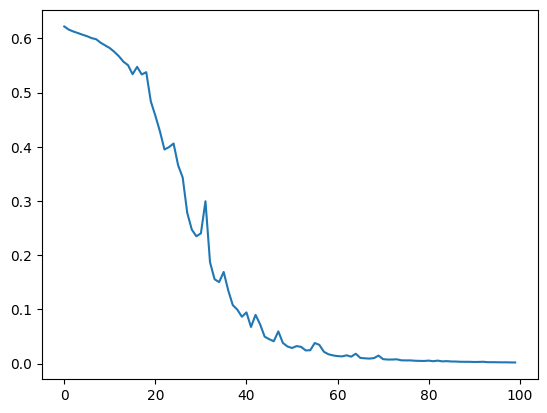

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['val_loss'])

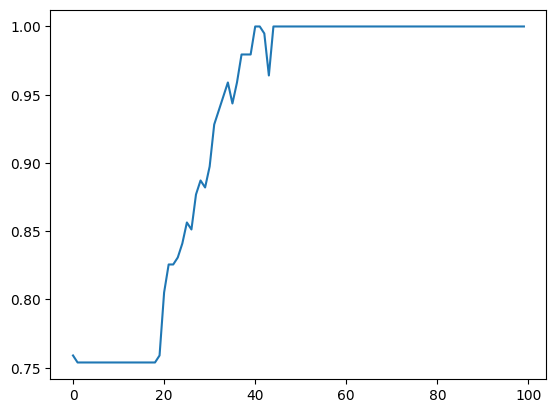

In [ ]:
plt.plot(history.history['accuracy'])



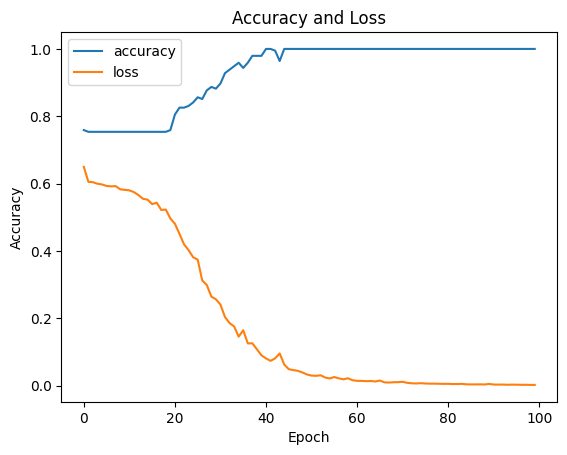

In [ ]:
import matplotlib.pyplot as plt

def plot_history(model):
    # Plot training & validation accuracy values
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['loss'])
    plt.title('Accuracy and Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(['accuracy', 'loss'], loc='upper left')
    plt.show()


# Call the function to plot the training history
plot_history(model)

# **TESTING THE MODEL**

**INPUT THE VALUES**

In [ ]:
#values from person 23 excluding the name and status column
input_Pdata = (153.88,172.86,78.128,0.0048,0.00003,0.00232,0.00267,0.00696,0.04137,0.37,0.02021,0.02591,0.04525,0.06062,0.01849,19.493,0.629017,0.698951,-5.18696,0.237622,2.557536,0.259765)


**CHANGE THE DATA INTO AN ARRAY**

In [ ]:
#changing input data to numpy array
input_Pdata_np = np.asarray(input_Pdata)

**RESHAPE THE DATA**

In [ ]:
#reshape the numpy array
input_Pdata_reshaped = input_Pdata_np.reshape(1,-1)

**STANDARIZED THE DATA**

In [ ]:
# scale to have a mean of 0 and a standard deviation of 1
scaler = StandardScaler()

# fits the scalar to the data
scaler.fit(input_Pdata_reshaped)

# creation of the standard version of the data
standard_data = scaler.transform(input_Pdata_reshaped)

**PROCEED TO PREDICTION**

In [ ]:
# The prediction of the system

model.fit(X, Y, epochs=80, batch_size=5, verbose=0)
pred = model.predict(standard_data)

if (pred[0] == 0):
    print("No Parkinson's")
else:
    print("Parkinson's detected")

1/1 [==============================] - 0s 58ms/step
Parkinson's detected


**RESULT:**

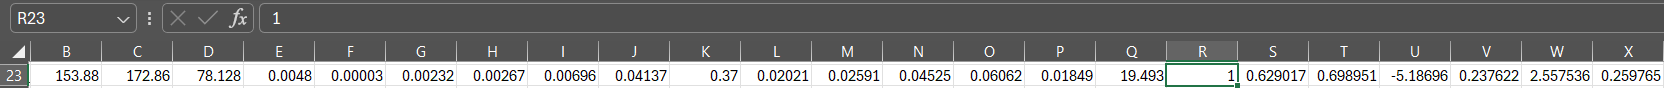


**base on the dataset, the column "status" of the person 23 is "1" implies that it is positive of Parkinson disease which matches the prediction of the model.**